In [72]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns

In [73]:
# cars.csv와 brand.csv 데이터 불러오기
car_df = pd.read_csv('/aiffel/data/cars.csv')

In [74]:
brand_df = pd.read_csv('/aiffel/data/brand.csv')

In [75]:
# 각 데이터 헤드 확인
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [76]:
# 컬럼별 의미
# Engine은 숫자가 클수록 마력이 좋다!
# service history 수리 유무? 0,1으로 바꿀 수 있는지 확인

# 중고차 가격에 영향 미치는 요소 : 연식, 주행거리, 브랜드, 엔진이 클수록
# 엔진 컬럼 L이랑 유로는 날리고, 컬럼명에 ()로 바꾸기

In [77]:
brand_df.head()

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


# 데이터 합치기

In [78]:
# 두 데이터의 title 값을 연결할 수 있을 것 처럼 보이므로, 합치기 전 각 데이터의 유니크값 확인
car_df['title'].unique

<bound method Series.unique of 0          SKODA FABIA
1       VAUXHALL CORSA
2          HYUNDAI I30
3           MINI HATCH
4       VAUXHALL CORSA
             ...      
3682    RENAULT MEGANE
3683           AUDI A4
3684      BMW 3 SERIES
3685      HONDA ACCORD
3686    VAUXHALL CORSA
Name: title, Length: 3687, dtype: object>

In [79]:
brand_df['title'].unique

<bound method Series.unique of 0             skoda
1          vauxhall
2           hyundai
3              mini
4              ford
5             volvo
6           peugeot
7               bmw
8           citroen
9     mercedes-benz
10            mazda
11             saab
12       volkswagen
13            honda
14               mg
15           toyota
16             seat
17           nissan
18             alfa
19          renault
20              kia
21           proton
22             fiat
23             audi
24       mitsubishi
25            lexus
26             land
27        chevrolet
28           suzuki
29            dacia
30         daihatsu
31             jeep
32           jaguar
33         chrysler
34            rover
35               ds
36           daewoo
37            dodge
38          porsche
39           subaru
40         infiniti
41           abarth
42            smart
43           marcos
44         maserati
45        ssangyong
46          lagonda
47            isuzu
Name: tit

In [80]:
# brand_df의 title 데이터들을 대문자로 바꿔주기
brand_df['title'].str.upper()

0             SKODA
1          VAUXHALL
2           HYUNDAI
3              MINI
4              FORD
5             VOLVO
6           PEUGEOT
7               BMW
8           CITROEN
9     MERCEDES-BENZ
10            MAZDA
11             SAAB
12       VOLKSWAGEN
13            HONDA
14               MG
15           TOYOTA
16             SEAT
17           NISSAN
18             ALFA
19          RENAULT
20              KIA
21           PROTON
22             FIAT
23             AUDI
24       MITSUBISHI
25            LEXUS
26             LAND
27        CHEVROLET
28           SUZUKI
29            DACIA
30         DAIHATSU
31             JEEP
32           JAGUAR
33         CHRYSLER
34            ROVER
35               DS
36           DAEWOO
37            DODGE
38          PORSCHE
39           SUBARU
40         INFINITI
41           ABARTH
42            SMART
43           MARCOS
44         MASERATI
45        SSANGYONG
46          LAGONDA
47            ISUZU
Name: title, dtype: object

In [81]:
# 문제 없으면 brand_df['title']에 덮어씌우기
brand_df['title'] = brand_df['title'].str.upper()

In [82]:
# brand_df의 title 컬럼명을 brand로 변경하고 데이터 업데이트
brand_df = brand_df.rename({'title': 'brand'}, axis = 1)

# 또는 brand_df.rename({'title': 'brand'}, axis = 1, inplace = 1)

In [83]:
# 잘 들어갔는지 확인
brand_df.head()

,brand,country
0,SKODA,Czech Republic
1,VAUXHALL,United Kingdom
2,HYUNDAI,South Korea
3,MINI,United Kingdom
4,FORD,United States


In [84]:
# car_df의 title을 띄어쓰기 기준으로 분리
car_df['title'].apply(lambda x: x.split()[0])

0          SKODA
1       VAUXHALL
2        HYUNDAI
3           MINI
4       VAUXHALL
          ...   
3682     RENAULT
3683        AUDI
3684         BMW
3685       HONDA
3686    VAUXHALL
Name: title, Length: 3687, dtype: object

In [85]:
# 위 데이터를 car_df에 'brand'라는 새로운 컬럼으로 지정
car_df['brand'] = car_df['title'].apply(lambda x: x.split()[0])

In [86]:
# 제대로 반영 되었는지 확인
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,SKODA
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,VAUXHALL
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,HYUNDAI
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,MINI
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,VAUXHALL


In [87]:
# 두 데이터테이블을 brand 컬럼 기준으로 합치기
car_df.merge(brand_df, on = 'brand', how = 'left')

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,VAUXHALL,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,RENAULT,France
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,AUDI,Germany
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,BMW,Germany
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full,HONDA,Japan


In [88]:
# 합쳐진 데이터를 new_car_df로 저장
new_car_df = car_df.merge(brand_df, on = 'brand', how = 'left')

# 데이터 형태 변환

In [89]:
# new_car_df의 컬럼별 결측치 및 dtype 확인
new_car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3687 entries, 0 to 3686
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
 13  brand              3687 non-null   object 
 14  country            3687 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 460.9+ KB


In [90]:
# object 타입인 Engine 컬럼을 숫자로 변환 가능할지 데이터 뽑아보기
new_car_df['Engine'].sort_values()

452     0.8L
1681    0.8L
1962    0.9L
3134    0.9L
2816    0.9L
        ... 
3098     NaN
3109     NaN
3199     NaN
3572     NaN
3623     NaN
Name: Engine, Length: 3687, dtype: object

In [91]:
# Engine 데이터에서 숫자만 추출해서 숫자형으로 변환
new_car_df['Engine'].str.extract(r'(\d+\.?\d*)').astype(float)

,0
0,1.4
1,1.2
2,1.4
3,1.4
4,1.3
...,...
3682,1.6
3683,2.0
3684,2.0
3685,2.2


In [92]:
# 데이터 이상 없으면 Engine에 덮어씌우기
new_car_df['Engine'] = new_car_df['Engine'].str.extract(r'(\d+\.?\d*)').astype(float)

In [93]:
# 혹시 모르니까 Engine 컬럼명에 단위 추가해주기
new_car_df = new_car_df.rename({'Engine': 'Engine(L)'}, axis = 1) 

In [94]:
new_car_df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine(L),Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,Euro 6,NaN,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,Euro 4,Full,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,Euro 5,NaN,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,Euro 4,Full,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3,Manual,5.0,5.0,Euro 5,NaN,VAUXHALL,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6,Manual,5.0,5.0,Euro 4,NaN,RENAULT,France
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0,Manual,4.0,5.0,Euro 5,NaN,AUDI,Germany
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0,Manual,4.0,5.0,Euro 5,NaN,BMW,Germany
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2,Manual,5.0,5.0,Euro 4,Full,HONDA,Japan


In [95]:
# Emission Class도 조회해보기
new_car_df['Emission Class'].sort_values()

2590    Euro 1
1053    Euro 1
1006    Euro 1
2026    Euro 1
931     Euro 2
         ...  
3199       NaN
3464       NaN
3572       NaN
3623       NaN
3677       NaN
Name: Emission Class, Length: 3687, dtype: object

In [96]:
# NaN값이 많아 보이니 세부 데이터 확인해보기
new_car_df[new_car_df['Emission Class'].isna()]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine(L),Gearbox,Doors,Seats,Emission Class,Service history,brand,country
8,VOLVO 740,750,225318,2025,NaN,Petrol,Estate,2.3,Automatic,5.0,NaN,NaN,NaN,VOLVO,Sweden
95,RENAULT FLUENCE,2490,67104,2010,1.0,Diesel,Saloon,1.5,Manual,4.0,5.0,NaN,NaN,RENAULT,France
163,HONDA ODYSSEY,2449,88240,2012,NaN,Petrol,MPV,2.4,Automatic,5.0,7.0,NaN,NaN,HONDA,Japan
178,MERCEDES-BENZ CLK,3995,70000,2009,NaN,Petrol,Coupe,2.0,Automatic,2.0,5.0,NaN,NaN,MERCEDES-BENZ,Germany
229,MERCEDES-BENZ 260,2995,57400,1991,NaN,Petrol,Saloon,2.6,Automatic,4.0,NaN,NaN,NaN,MERCEDES-BENZ,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3199,NISSAN LEAF,5390,60695,2014,NaN,Electric,Hatchback,NaN,Automatic,5.0,5.0,NaN,NaN,NISSAN,Japan
3464,TOYOTA CARINA,2450,120000,1991,NaN,Petrol,Saloon,1.6,Manual,4.0,NaN,NaN,NaN,TOYOTA,Japan
3572,ISUZU TROOPER,2250,147700,2001,NaN,Diesel,SUV,NaN,Automatic,5.0,5.0,NaN,NaN,ISUZU,Japan
3623,VAUXHALL CORSA,13998,28045,2020,NaN,Electric,Hatchback,NaN,Automatic,5.0,5.0,NaN,NaN,VAUXHALL,United Kingdom


In [97]:
# Emission Class도 숫자만 분리해서 숫자형으로 변환
new_car_df['Emission Class'].apply(lambda x: int(x.split()[1]) if pd.notna(x) else np.nan)

0       6.0
1       4.0
2       5.0
3       4.0
4       5.0
       ... 
3682    4.0
3683    5.0
3684    5.0
3685    4.0
3686    5.0
Name: Emission Class, Length: 3687, dtype: float64

In [98]:
# 잘 반영되었으면 Emission Class에 덮어씌우기
new_car_df['Emission Class'] = new_car_df['Emission Class'].apply(lambda x: int(x.split()[1]) if pd.notna(x) else np.nan)

In [99]:
new_car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine(L),Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,NaN,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,NaN,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,NaN,VAUXHALL,United Kingdom


In [100]:
# Emission Class도 컬럼명에 (EURO) 추가해주기
new_car_df.rename({'Emission Class': 'Emission Class(EURO)'}, axis = 1) 

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine(L),Gearbox,Doors,Seats,Emission Class(EURO),Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,NaN,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,NaN,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,NaN,VAUXHALL,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6,Manual,5.0,5.0,4.0,NaN,RENAULT,France
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0,Manual,4.0,5.0,5.0,NaN,AUDI,Germany
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0,Manual,4.0,5.0,5.0,NaN,BMW,Germany
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2,Manual,5.0,5.0,4.0,Full,HONDA,Japan


In [101]:
# 데이터 이상 없으면 new_car_df 데이터 업데이트
new_car_df = new_car_df.rename({'Emission Class': 'Emission Class(EURO)'}, axis = 1) 

In [102]:
new_car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3687 entries, 0 to 3686
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 3687 non-null   object 
 1   Price                 3687 non-null   int64  
 2   Mileage(miles)        3687 non-null   int64  
 3   Registration_Year     3687 non-null   int64  
 4   Previous Owners       2276 non-null   float64
 5   Fuel type             3687 non-null   object 
 6   Body type             3687 non-null   object 
 7   Engine(L)             3642 non-null   float64
 8   Gearbox               3687 non-null   object 
 9   Doors                 3662 non-null   float64
 10  Seats                 3652 non-null   float64
 11  Emission Class(EURO)  3600 non-null   float64
 12  Service history       540 non-null    object 
 13  brand                 3687 non-null   object 
 14  country               3687 non-null   object 
dtypes: float64(5), int64(

# 결측치 처리

In [103]:
# previous owner, engine, doors, seats, emission class에 결측치
# 특히 service history 결측치 엄청 많음

new_car_df.isna().mean()

title                   0.000000
Price                   0.000000
Mileage(miles)          0.000000
Registration_Year       0.000000
Previous Owners         0.382696
Fuel type               0.000000
Body type               0.000000
Engine(L)               0.012205
Gearbox                 0.000000
Doors                   0.006781
Seats                   0.009493
Emission Class(EURO)    0.023596
Service history         0.853539
brand                   0.000000
country                 0.000000
dtype: float64

In [104]:
# 결측치 가장 많은 Service history 뜯어보기
new_car_df['Service history'].sort_values()

1       Full
2566    Full
2563    Full
2558    Full
2552    Full
        ... 
3681     NaN
3682     NaN
3683     NaN
3684     NaN
3686     NaN
Name: Service history, Length: 3687, dtype: object

In [105]:
# Service history에 어떤 값들이 들어있는지 확인
new_car_df['Service history'].unique()

array([nan, 'Full'], dtype=object)

In [106]:
# Service history 결측치 unknown으로 채워주기
new_car_df['Service history'].fillna('Unknown')

0       Unknown
1          Full
2       Unknown
3          Full
4       Unknown
         ...   
3682    Unknown
3683    Unknown
3684    Unknown
3685       Full
3686    Unknown
Name: Service history, Length: 3687, dtype: object

In [124]:
new_car_df['Service history'] = new_car_df['Service history'].fillna('Unknown')

# 중복값 확인


In [125]:
new_car_df[new_car_df.duplicated()]
# 총 828행

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine(L),Gearbox,Doors,Seats,Emission Class(EURO),Service history,brand,country
12,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,SKODA,Czech Republic
20,CITROEN C4,1949,114000,2013,NaN,Diesel,Hatchback,1.6,Manual,5.0,5.0,5.0,Unknown,CITROEN,France
25,VAUXHALL INSIGNIA,2950,79000,2011,4.0,Petrol,Hatchback,1.8,Manual,5.0,5.0,5.0,Unknown,VAUXHALL,United Kingdom
39,MERCEDES-BENZ A CLASS,15900,62402,2019,1.0,Petrol,Hatchback,1.3,Automatic,5.0,5.0,6.0,Unknown,MERCEDES-BENZ,Germany
52,VAUXHALL CORSA,10698,22782,2020,NaN,Petrol,Hatchback,1.2,Manual,5.0,5.0,6.0,Unknown,VAUXHALL,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3662,MINI HATCH,11999,33156,2018,1.0,Petrol,Hatchback,1.5,Manual,5.0,5.0,6.0,Full,MINI,United Kingdom
3663,VAUXHALL ASTRA,4999,60139,2015,2.0,Petrol,Hatchback,1.6,Manual,5.0,5.0,6.0,Unknown,VAUXHALL,United Kingdom
3674,MITSUBISHI OUTLANDER,1489,145000,2007,NaN,Diesel,SUV,2.0,Manual,5.0,7.0,4.0,Unknown,MITSUBISHI,Japan
3675,VAUXHALL ASTRA,4999,60139,2015,2.0,Petrol,Hatchback,1.6,Manual,5.0,5.0,6.0,Unknown,VAUXHALL,United Kingdom


In [126]:
# 진짜 중복인지 하나 골라서 상세 데이터 뜯어보기
new_car_df[(new_car_df['title'] == 'SKODA FABIA') & (new_car_df['Mileage(miles)'] == 70189)]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine(L),Gearbox,Doors,Seats,Emission Class(EURO),Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,SKODA,Czech Republic
12,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,SKODA,Czech Republic
391,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,SKODA,Czech Republic
402,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,SKODA,Czech Republic
571,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,SKODA,Czech Republic
624,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,SKODA,Czech Republic
675,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,SKODA,Czech Republic
676,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,SKODA,Czech Republic
688,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,SKODA,Czech Republic
689,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,SKODA,Czech Republic


In [127]:
# 혹시 모르니까 다른 데이터도 하나 더 뜯어보기
new_car_df[(new_car_df['title'] == 'MERCEDES-BENZ A CLASS') & (new_car_df['Mileage(miles)'] == 62402)]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine(L),Gearbox,Doors,Seats,Emission Class(EURO),Service history,brand,country
26,MERCEDES-BENZ A CLASS,15900,62402,2019,1.0,Petrol,Hatchback,1.3,Automatic,5.0,5.0,6.0,Unknown,MERCEDES-BENZ,Germany
39,MERCEDES-BENZ A CLASS,15900,62402,2019,1.0,Petrol,Hatchback,1.3,Automatic,5.0,5.0,6.0,Unknown,MERCEDES-BENZ,Germany
79,MERCEDES-BENZ A CLASS,15900,62402,2019,1.0,Petrol,Hatchback,1.3,Automatic,5.0,5.0,6.0,Unknown,MERCEDES-BENZ,Germany
91,MERCEDES-BENZ A CLASS,15900,62402,2019,1.0,Petrol,Hatchback,1.3,Automatic,5.0,5.0,6.0,Unknown,MERCEDES-BENZ,Germany
145,MERCEDES-BENZ A CLASS,15900,62402,2019,1.0,Petrol,Hatchback,1.3,Automatic,5.0,5.0,6.0,Unknown,MERCEDES-BENZ,Germany
157,MERCEDES-BENZ A CLASS,15900,62402,2019,1.0,Petrol,Hatchback,1.3,Automatic,5.0,5.0,6.0,Unknown,MERCEDES-BENZ,Germany
223,MERCEDES-BENZ A CLASS,15900,62402,2019,1.0,Petrol,Hatchback,1.3,Automatic,5.0,5.0,6.0,Unknown,MERCEDES-BENZ,Germany
429,MERCEDES-BENZ A CLASS,15900,62402,2019,1.0,Petrol,Hatchback,1.3,Automatic,5.0,5.0,6.0,Unknown,MERCEDES-BENZ,Germany
441,MERCEDES-BENZ A CLASS,15900,62402,2019,1.0,Petrol,Hatchback,1.3,Automatic,5.0,5.0,6.0,Unknown,MERCEDES-BENZ,Germany
468,MERCEDES-BENZ A CLASS,15900,62402,2019,1.0,Petrol,Hatchback,1.3,Automatic,5.0,5.0,6.0,Unknown,MERCEDES-BENZ,Germany


In [128]:
# 중복된 행 삭제
# step.1 : 타이틀과 마일리지가 모두 일치하는 경우 첫 번째 행만 False 표시
new_car_df.duplicated(subset=['title', 'Mileage(miles)'], keep='first')

0       False
1       False
2       False
3       False
4       False
        ...  
3682    False
3683    False
3684     True
3685    False
3686    False
Length: 3687, dtype: bool

In [129]:
# 위 데이터 별칭 지정
duplicated_mask = new_car_df.duplicated(subset=['title', 'Mileage(miles)'], keep='first')

In [130]:
# 중복행 제거 (얼마나 삭제되는지 확인)
new_car_df[~duplicated_mask]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine(L),Gearbox,Doors,Seats,Emission Class(EURO),Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,Unknown,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,Unknown,VAUXHALL,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3681,NISSAN QASHQAI,1695,104000,2009,3.0,Petrol,Hatchback,1.6,Manual,5.0,5.0,4.0,Unknown,NISSAN,Japan
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6,Manual,5.0,5.0,4.0,Unknown,RENAULT,France
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0,Manual,4.0,5.0,5.0,Unknown,AUDI,Germany
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2,Manual,5.0,5.0,4.0,Full,HONDA,Japan


In [131]:
# 중복행 최종 삭제
unique_new_car_df = new_car_df[~duplicated_mask]

In [132]:
unique_new_car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine(L),Gearbox,Doors,Seats,Emission Class(EURO),Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,Unknown,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,Unknown,VAUXHALL,United Kingdom


In [188]:
unique_new_car_df.shape[0]

2744

In [133]:
# 컬럼별 결측치 비율 재확인
unique_new_car_df.isna().mean()

title                   0.000000
Price                   0.000000
Mileage(miles)          0.000000
Registration_Year       0.000000
Previous Owners         0.341472
Fuel type               0.000000
Body type               0.000000
Engine(L)               0.005831
Gearbox                 0.000000
Doors                   0.009111
Seats                   0.012755
Emission Class(EURO)    0.020773
Service history         0.000000
brand                   0.000000
country                 0.000000
dtype: float64

In [144]:
# nan 개수 카운팅
nan_counts = unique_new_car_df.isna().sum(axis=1)

In [145]:
# nan이 3개 이상인 데이터 선별
rows_with_3_or_more_nans = unique_new_car_df[nan_counts >= 3]

In [146]:
rows_with_3_or_more_nans

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine(L),Gearbox,Doors,Seats,Emission Class(EURO),Service history,brand,country
8,VOLVO 740,750,225318,2025,NaN,Petrol,Estate,2.3,Automatic,5.0,NaN,NaN,Unknown,VOLVO,Sweden
229,MERCEDES-BENZ 260,2995,57400,1991,NaN,Petrol,Saloon,2.6,Automatic,4.0,NaN,NaN,Unknown,MERCEDES-BENZ,Germany
513,NISSAN LAFESTA,3900,37000,2012,NaN,Petrol,MPV,2.0,Automatic,NaN,NaN,NaN,Unknown,NISSAN,Japan
679,BMW 3 SERIES,4200,68060,2007,1.0,Petrol,Saloon,NaN,Automatic,NaN,NaN,NaN,Full,BMW,Germany
699,MITSUBISHI FTO,8900,58900,2001,NaN,Petrol,Coupe,2.0,Automatic,NaN,NaN,NaN,Unknown,MITSUBISHI,Japan
733,TOYOTA CAMRY,2389,125000,1990,NaN,Petrol,Estate,2.0,Automatic,5.0,NaN,NaN,Unknown,TOYOTA,Japan
823,VOLKSWAGEN POLO,6700,49600,2012,NaN,Petrol,Hatchback,1.2,Automatic,NaN,NaN,NaN,Unknown,VOLKSWAGEN,Germany
835,TOYOTA MARK X,7500,77000,2021,3.0,Petrol,Saloon,NaN,Automatic,NaN,NaN,NaN,Unknown,TOYOTA,Japan
856,NISSAN CUBIC,4500,47000,2007,3.0,Petrol,Hatchback,NaN,Manual,NaN,NaN,NaN,Unknown,NISSAN,Japan
1038,HONDA JAZZ,6750,33000,2013,NaN,Petrol Hybrid,Hatchback,1.5,Automatic,NaN,5.0,NaN,Unknown,HONDA,Japan


In [147]:
# 몇개 안되니까 삭제~
# nan이 3개 미만인 데이터만 남기도록 업데이트
nn_unique_new_car_df = unique_new_car_df[nan_counts < 3]

In [148]:
nn_unique_new_car_df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine(L),Gearbox,Doors,Seats,Emission Class(EURO),Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,Unknown,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,Unknown,VAUXHALL,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3681,NISSAN QASHQAI,1695,104000,2009,3.0,Petrol,Hatchback,1.6,Manual,5.0,5.0,4.0,Unknown,NISSAN,Japan
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6,Manual,5.0,5.0,4.0,Unknown,RENAULT,France
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0,Manual,4.0,5.0,5.0,Unknown,AUDI,Germany
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2,Manual,5.0,5.0,4.0,Full,HONDA,Japan


In [194]:
# 컬럼별 결측치 비율 재확인
nn_unique_new_car_df.isna().mean()

title                   0.000000
Price                   0.000000
Mileage(miles)          0.000000
Registration_Year       0.000000
Previous Owners         0.337758
Fuel type               0.000000
Body type               0.000000
Engine(L)               0.000369
Gearbox                 0.000000
Doors                   0.002581
Seats                   0.004056
Emission Class(EURO)    0.009218
Service history         0.000000
brand                   0.000000
country                 0.000000
dtype: float64

In [195]:
# Doors 결측치 상세 데이터 확인
nn_unique_new_car_df[nn_unique_new_car_df['Doors'].isna()]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine(L),Gearbox,Doors,Seats,Emission Class(EURO),Service history,brand,country
595,VAUXHALL ASTRA,3950,56800,2015,4.0,Diesel,Hatchback,1.7,Manual,NaN,5.0,NaN,Unknown,VAUXHALL,United Kingdom
957,NISSAN ELGRAND,4200,96000,2017,3.0,Petrol,Minibus,2.0,Automatic,NaN,7.0,NaN,Unknown,NISSAN,Japan
1613,VOLKSWAGEN GOLF,1895,61000,2001,5.0,Petrol,Hatchback,1.6,Automatic,NaN,5.0,NaN,Unknown,VOLKSWAGEN,Germany
1957,JAGUAR XJ,8000,95000,2011,5.0,Diesel,Saloon,3.0,Automatic,NaN,5.0,NaN,Full,JAGUAR,United Kingdom
2235,TOYOTA PRIUS,6350,72000,2012,1.0,Petrol Hybrid,Hatchback,1.8,Automatic,NaN,5.0,NaN,Unknown,TOYOTA,Japan
2375,MARCOS MARTINA,11495,19000,1981,5.0,Petrol,Convertible,2.0,Manual,NaN,2.0,NaN,Unknown,MARCOS,United Kingdom
2762,HONDA FIT,4450,79208,2010,1.0,Petrol,Hatchback,1.3,Automatic,NaN,5.0,NaN,Unknown,HONDA,Japan


In [199]:
# Doors 비어있는 행 전체 삭제
nn_unique_new_car_df.dropna(subset = ['Doors'])

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine(L),Gearbox,Doors,Seats,Emission Class(EURO),Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,Unknown,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,Unknown,VAUXHALL,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3681,NISSAN QASHQAI,1695,104000,2009,3.0,Petrol,Hatchback,1.6,Manual,5.0,5.0,4.0,Unknown,NISSAN,Japan
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6,Manual,5.0,5.0,4.0,Unknown,RENAULT,France
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0,Manual,4.0,5.0,5.0,Unknown,AUDI,Germany
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2,Manual,5.0,5.0,4.0,Full,HONDA,Japan


In [200]:
# 데이터테이블 업데이트
nn_unique_new_car_df = nn_unique_new_car_df.dropna(subset = ['Doors'])

In [201]:
# seats 결측치 세부 내역 확인
nn_unique_new_car_df[nn_unique_new_car_df['Seats'].isna()]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine(L),Gearbox,Doors,Seats,Emission Class(EURO),Service history,brand,country
107,CITROEN XM,3250,126000,1995,4.0,Diesel,Hatchback,2.5,Manual,5.0,NaN,2.0,Unknown,CITROEN,France
237,MG MIDGET,1875,75043,1972,3.0,Petrol,Convertible,1.3,Manual,2.0,NaN,NaN,Unknown,MG,United Kingdom
645,ROVER MINI,1650,49309,1990,4.0,Petrol,Saloon,1.0,Automatic,2.0,NaN,NaN,Unknown,ROVER,United Kingdom
931,BMW 3 SERIES,6700,105000,1999,7.0,Petrol,Coupe,2.5,Manual,2.0,NaN,2.0,Unknown,BMW,Germany
1006,SAAB 900,5995,157000,1992,5.0,Petrol,Convertible,2.0,Manual,2.0,NaN,1.0,Unknown,SAAB,Sweden
1053,VOLKSWAGEN GOLF,1250,110000,1996,NaN,Petrol,Convertible,2.0,Manual,2.0,NaN,1.0,Unknown,VOLKSWAGEN,Germany
1353,BMW 3 SERIES,3495,115000,1987,4.0,Petrol,Saloon,1.8,Automatic,4.0,NaN,NaN,Unknown,BMW,Germany
1381,CITROEN BX,4975,96000,1990,3.0,Petrol,Hatchback,1.6,Manual,5.0,NaN,NaN,Unknown,CITROEN,France
2026,PROTON PROTON,3995,15760,1995,NaN,Petrol,Hatchback,1.5,Manual,5.0,NaN,1.0,Unknown,PROTON,Malaysia
2456,VAUXHALL COMBO,4250,35616,2010,1.0,Diesel,Combi Van,1.3,Manual,3.0,NaN,4.0,Unknown,VAUXHALL,United Kingdom


In [202]:
# 이것도 다 삭제&테이블 업데이트
nn_unique_new_car_df = nn_unique_new_car_df.dropna(subset = ['Seats'])

In [203]:
# 컬럼별 결측치 비율 재재확인
nn_unique_new_car_df.isna().mean()

title                   0.000000
Price                   0.000000
Mileage(miles)          0.000000
Registration_Year       0.000000
Previous Owners         0.339272
Fuel type               0.000000
Body type               0.000000
Engine(L)               0.000371
Gearbox                 0.000000
Doors                   0.000000
Seats                   0.000000
Emission Class(EURO)    0.004826
Service history         0.000000
brand                   0.000000
country                 0.000000
dtype: float64

In [205]:
# 그냥 결측치 있는 데이터 다 삭제...(1771행)
dropna_data = nn_unique_new_car_df.dropna()

In [207]:
dropna_data.isna().mean()

title                   0.0
Price                   0.0
Mileage(miles)          0.0
Registration_Year       0.0
Previous Owners         0.0
Fuel type               0.0
Body type               0.0
Engine(L)               0.0
Gearbox                 0.0
Doors                   0.0
Seats                   0.0
Emission Class(EURO)    0.0
Service history         0.0
brand                   0.0
country                 0.0
dtype: float64

In [209]:
dropna_data.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine(L),Doors,Seats,Emission Class(EURO)
count,1771.000000,1.771000e+03,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000
mean,5581.094862,8.377842e+04,2011.896104,2.865613,1.624732,4.386222,4.909656,4.906268
std,4321.370995,4.316491e+04,4.527061,1.536379,0.492243,0.954864,0.604851,0.868286
min,400.000000,6.000000e+00,1993.000000,1.000000,0.800000,2.000000,2.000000,1.000000
25%,2490.000000,5.857650e+04,2009.000000,2.000000,1.300000,4.000000,5.000000,4.000000
50%,4000.000000,8.200000e+04,2012.000000,3.000000,1.600000,5.000000,5.000000,5.000000
75%,7482.000000,1.060000e+05,2015.000000,4.000000,2.000000,5.000000,5.000000,6.000000
max,33900.000000,1.110100e+06,2023.000000,9.000000,6.300000,5.000000,7.000000,6.000000


In [215]:
# previous owner가 9인게 정상인지 한번 세부 데이터 조회해보기
dropna_data[dropna_data['Previous Owners'] == 9.0]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine(L),Gearbox,Doors,Seats,Emission Class(EURO),Service history,brand,country
212,VAUXHALL CORSA,1500,96270,2008,9.0,Petrol,Hatchback,1.4,Manual,5.0,5.0,4.0,Unknown,VAUXHALL,United Kingdom
404,BMW 3 SERIES,2500,138910,2003,9.0,Petrol,Convertible,2.5,Manual,2.0,4.0,3.0,Unknown,BMW,Germany
1314,MINI HATCH,1875,98710,2007,9.0,Petrol,Hatchback,1.6,Manual,3.0,4.0,4.0,Unknown,MINI,United Kingdom
3331,PEUGEOT 207 SW,895,114312,2008,9.0,Petrol,Estate,1.4,Manual,5.0,5.0,4.0,Unknown,PEUGEOT,France
3463,PEUGEOT 207 SW,1450,115000,2009,9.0,Petrol,Estate,1.4,Manual,5.0,5.0,4.0,Unknown,PEUGEOT,France


In [222]:
# 각 컬럼별로 어떤 데이터들 있는지 추가 확인
dropna_data['Fuel type'].value_counts()

Petrol                   1113
Diesel                    644
Petrol Hybrid              10
Petrol Plug-in Hybrid       3
Diesel Hybrid               1
Name: Fuel type, dtype: int64

In [223]:
dropna_data['Body type'].value_counts()

Hatchback      1062
SUV             268
Saloon          166
Estate           84
MPV              80
Coupe            58
Convertible      51
Pickup            2
Name: Body type, dtype: int64

In [224]:
dropna_data['Gearbox'].value_counts()

Manual       1407
Automatic     364
Name: Gearbox, dtype: int64

In [225]:
dropna_data['brand'].value_counts()

VAUXHALL         238
FORD             199
VOLKSWAGEN       138
BMW              124
PEUGEOT          109
NISSAN            93
RENAULT           85
MERCEDES-BENZ     78
AUDI              74
TOYOTA            64
HONDA             55
CITROEN           55
HYUNDAI           54
MINI              48
FIAT              44
KIA               41
MAZDA             39
SKODA             32
SEAT              31
LAND              22
VOLVO             21
SUZUKI            21
JAGUAR            16
MITSUBISHI        13
ALFA              12
DACIA             10
CHEVROLET          8
JEEP               6
LEXUS              6
SAAB               5
INFINITI           4
DS                 4
CHRYSLER           3
SUBARU             3
MG                 3
PORSCHE            2
ABARTH             2
SMART              2
MASERATI           2
DAIHATSU           1
ROVER              1
DAEWOO             1
PROTON             1
SSANGYONG          1
Name: brand, dtype: int64

# 원핫인코딩


In [226]:
df_encoded = pd.get_dummies(dropna_data, drop_first=True)

In [227]:
df_encoded

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine(L),Doors,Seats,Emission Class(EURO),title_ABARTH FIAT 595 1.4 TJET (165PS) SCORPIONEORO,title_ALFA ROMEO 159,...,country_Germany,country_Italy,country_Japan,country_Malaysia,country_Romania,country_South Korea,country_Spain,country_Sweden,country_United Kingdom,country_United States
0,6900,70189,2016,3.0,1.4,5.0,5.0,6.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1495,88585,2008,4.0,1.2,3.0,5.0,4.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2395,96731,2010,5.0,1.4,3.0,4.0,4.0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,800,124196,2007,3.0,2.0,3.0,4.0,4.0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,1299,87000,2008,5.0,1.6,5.0,5.0,4.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3678,2750,100000,2004,3.0,3.7,5.0,5.0,3.0,0,0,...,0,0,0,0,0,0,0,0,0,1
3679,2475,156097,1998,2.0,2.2,2.0,4.0,2.0,0,0,...,0,0,1,0,0,0,0,0,0,0
3681,1695,104000,2009,3.0,1.6,5.0,5.0,4.0,0,0,...,0,0,1,0,0,0,0,0,0,0
3682,1395,76202,2006,4.0,1.6,5.0,5.0,4.0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 스케일링


In [228]:
# 라이브러리 불러오기
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [229]:
# 라이브러리 불러온 다음에는 이후 사용하기 편리하게 고유한 이름 지정
ss = StandardScaler()
rs = RobustScaler()
mm = MinMaxScaler()

In [230]:
# 학습 시키기(평균, 표준편차 학습)
ss.fit(df_encoded)

StandardScaler()

In [231]:
ss.transform(df_encoded)

array([[ 0.30529146, -0.31491469,  0.90678145, ..., -0.12206438,
        -0.47676433, -0.37270196],
       [-0.94582228,  0.11138523, -0.86086847, ..., -0.12206438,
         2.09747235, -0.37270196],
       [-0.73749622,  0.30015666, -0.41895599, ..., -0.12206438,
         2.09747235, -0.37270196],
       ...,
       [-0.8995276 ,  0.46860492, -0.63991223, ..., -0.12206438,
        -0.47676433, -0.37270196],
       [-0.96896962, -0.17557237, -1.30278094, ..., -0.12206438,
        -0.47676433, -0.37270196],
       [-0.82892821, -0.03750458,  0.24391273, ..., -0.12206438,
         2.09747235, -0.37270196]])

In [232]:
# 한눈에 보기 어려우므로 데이터프레임으로 바꿔주기
pd.DataFrame(ss.transform(df_encoded))

,0,1,2,3,4,5,6,7,8,9,...,422,423,424,425,426,427,428,429,430,431
0,0.305291,-0.314915,0.906781,0.087495,-0.456675,0.642972,0.149409,1.260001,-0.023769,-0.041193,...,-0.555826,-0.187262,-0.450694,-0.023769,-0.075356,-0.240718,-0.133477,-0.122064,-0.476764,-0.372702
1,-0.945822,0.111385,-0.860868,0.738560,-0.863093,-1.452159,0.149409,-1.044038,-0.023769,-0.041193,...,-0.555826,-0.187262,-0.450694,-0.023769,-0.075356,-0.240718,-0.133477,-0.122064,2.097472,-0.372702
2,-0.737496,0.300157,-0.418956,1.389625,-0.456675,-1.452159,-1.504358,-1.044038,-0.023769,-0.041193,...,-0.555826,-0.187262,-0.450694,-0.023769,-0.075356,-0.240718,-0.133477,-0.122064,2.097472,-0.372702
3,-1.106696,0.936617,-1.081825,0.087495,0.762579,-1.452159,-1.504358,-1.044038,-0.023769,-0.041193,...,-0.555826,-0.187262,-0.450694,-0.023769,-0.075356,4.154243,-0.133477,-0.122064,-0.476764,-0.372702
4,-0.991191,0.074655,-0.860868,1.389625,-0.050257,0.642972,0.149409,-1.044038,-0.023769,-0.041193,...,-0.555826,-0.187262,-0.450694,-0.023769,-0.075356,-0.240718,-0.133477,-0.122064,-0.476764,-0.372702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1766,-0.655323,0.375911,-1.744693,0.087495,4.217133,0.642972,0.149409,-2.196057,-0.023769,-0.041193,...,-0.555826,-0.187262,-0.450694,-0.023769,-0.075356,-0.240718,-0.133477,-0.122064,-0.476764,2.683109
1767,-0.718978,1.675875,-3.070431,-0.563570,1.168997,-2.499725,-1.504358,-3.348076,-0.023769,-0.041193,...,-0.555826,-0.187262,2.218801,-0.023769,-0.075356,-0.240718,-0.133477,-0.122064,-0.476764,-0.372702
1768,-0.899528,0.468605,-0.639912,0.087495,-0.050257,0.642972,0.149409,-1.044038,-0.023769,-0.041193,...,-0.555826,-0.187262,2.218801,-0.023769,-0.075356,-0.240718,-0.133477,-0.122064,-0.476764,-0.372702
1769,-0.968970,-0.175572,-1.302781,0.738560,-0.050257,0.642972,0.149409,-1.044038,-0.023769,-0.041193,...,-0.555826,-0.187262,-0.450694,-0.023769,-0.075356,-0.240718,-0.133477,-0.122064,-0.476764,-0.372702


In [233]:
pd.DataFrame(ss.transform(df_encoded), columns = df_encoded.columns)

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine(L),Doors,Seats,Emission Class(EURO),title_ABARTH FIAT 595 1.4 TJET (165PS) SCORPIONEORO,title_ALFA ROMEO 159,...,country_Germany,country_Italy,country_Japan,country_Malaysia,country_Romania,country_South Korea,country_Spain,country_Sweden,country_United Kingdom,country_United States
0,0.305291,-0.314915,0.906781,0.087495,-0.456675,0.642972,0.149409,1.260001,-0.023769,-0.041193,...,-0.555826,-0.187262,-0.450694,-0.023769,-0.075356,-0.240718,-0.133477,-0.122064,-0.476764,-0.372702
1,-0.945822,0.111385,-0.860868,0.738560,-0.863093,-1.452159,0.149409,-1.044038,-0.023769,-0.041193,...,-0.555826,-0.187262,-0.450694,-0.023769,-0.075356,-0.240718,-0.133477,-0.122064,2.097472,-0.372702
2,-0.737496,0.300157,-0.418956,1.389625,-0.456675,-1.452159,-1.504358,-1.044038,-0.023769,-0.041193,...,-0.555826,-0.187262,-0.450694,-0.023769,-0.075356,-0.240718,-0.133477,-0.122064,2.097472,-0.372702
3,-1.106696,0.936617,-1.081825,0.087495,0.762579,-1.452159,-1.504358,-1.044038,-0.023769,-0.041193,...,-0.555826,-0.187262,-0.450694,-0.023769,-0.075356,4.154243,-0.133477,-0.122064,-0.476764,-0.372702
4,-0.991191,0.074655,-0.860868,1.389625,-0.050257,0.642972,0.149409,-1.044038,-0.023769,-0.041193,...,-0.555826,-0.187262,-0.450694,-0.023769,-0.075356,-0.240718,-0.133477,-0.122064,-0.476764,-0.372702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1766,-0.655323,0.375911,-1.744693,0.087495,4.217133,0.642972,0.149409,-2.196057,-0.023769,-0.041193,...,-0.555826,-0.187262,-0.450694,-0.023769,-0.075356,-0.240718,-0.133477,-0.122064,-0.476764,2.683109
1767,-0.718978,1.675875,-3.070431,-0.563570,1.168997,-2.499725,-1.504358,-3.348076,-0.023769,-0.041193,...,-0.555826,-0.187262,2.218801,-0.023769,-0.075356,-0.240718,-0.133477,-0.122064,-0.476764,-0.372702
1768,-0.899528,0.468605,-0.639912,0.087495,-0.050257,0.642972,0.149409,-1.044038,-0.023769,-0.041193,...,-0.555826,-0.187262,2.218801,-0.023769,-0.075356,-0.240718,-0.133477,-0.122064,-0.476764,-0.372702
1769,-0.968970,-0.175572,-1.302781,0.738560,-0.050257,0.642972,0.149409,-1.044038,-0.023769,-0.041193,...,-0.555826,-0.187262,-0.450694,-0.023769,-0.075356,-0.240718,-0.133477,-0.122064,-0.476764,-0.372702


In [234]:
ss_df_encoded = pd.DataFrame(ss.transform(df_encoded), columns = df_encoded.columns)

In [235]:
ss_df_encoded.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine(L),Doors,Seats,Emission Class(EURO),title_ABARTH FIAT 595 1.4 TJET (165PS) SCORPIONEORO,title_ALFA ROMEO 159,...,country_Germany,country_Italy,country_Japan,country_Malaysia,country_Romania,country_South Korea,country_Spain,country_Sweden,country_United Kingdom,country_United States
count,1.771000e+03,1.771000e+03,1.771000e+03,1.771000e+03,1.771000e+03,1.771000e+03,1.771000e+03,1.771000e+03,1.771000e+03,1.771000e+03,...,1.771000e+03,1.771000e+03,1.771000e+03,1771.000000,1.771000e+03,1.771000e+03,1.771000e+03,1.771000e+03,1.771000e+03,1.771000e+03
mean,-3.209679e-17,9.629038e-17,2.221098e-14,6.419358e-17,-1.163509e-16,1.925808e-16,-6.915856e-16,-3.851615e-16,4.012099e-18,1.705142e-17,...,3.209679e-17,1.203630e-17,4.814519e-17,0.000000,2.106352e-17,-4.012099e-17,6.018149e-18,-2.407259e-17,8.626013e-17,-2.156503e-17
std,1.000282e+00,1.000282e+00,1.000282e+00,1.000282e+00,1.000282e+00,1.000282e+00,1.000282e+00,1.000282e+00,1.000282e+00,1.000282e+00,...,1.000282e+00,1.000282e+00,1.000282e+00,1.000282,1.000282e+00,1.000282e+00,1.000282e+00,1.000282e+00,1.000282e+00,1.000282e+00
min,-1.199286e+00,-1.941301e+00,-4.175212e+00,-1.214635e+00,-1.675930e+00,-2.499725e+00,-4.811893e+00,-4.500095e+00,-2.376913e-02,-4.119263e-02,...,-5.558265e-01,-1.872624e-01,-4.506939e-01,-0.023769,-7.535643e-02,-2.407178e-01,-1.334769e-01,-1.220644e-01,-4.767643e-01,-3.727020e-01
25%,-7.155062e-01,-5.840171e-01,-6.399122e-01,-5.635700e-01,-6.598844e-01,-4.045934e-01,1.494087e-01,-1.044038e+00,-2.376913e-02,-4.119263e-02,...,-5.558265e-01,-1.872624e-01,-4.506939e-01,-0.023769,-7.535643e-02,-2.407178e-01,-1.334769e-01,-1.220644e-01,-4.767643e-01,-3.727020e-01
50%,-3.659814e-01,-4.121234e-02,2.295649e-02,8.749488e-02,-5.025723e-02,6.429722e-01,1.494087e-01,1.079815e-01,-2.376913e-02,-4.119263e-02,...,-5.558265e-01,-1.872624e-01,-4.506939e-01,-0.023769,-7.535643e-02,-2.407178e-01,-1.334769e-01,-1.220644e-01,-4.767643e-01,-3.727020e-01
75%,4.400090e-01,5.149519e-01,6.858252e-01,7.385597e-01,7.625789e-01,6.429722e-01,1.494087e-01,1.260001e+00,-2.376913e-02,-4.119263e-02,...,-5.558265e-01,-1.872624e-01,-4.506939e-01,-0.023769,-7.535643e-02,-2.407178e-01,-1.334769e-01,-1.220644e-01,-4.767643e-01,-3.727020e-01
max,6.555073e+00,2.378348e+01,2.453475e+00,3.993884e+00,9.500568e+00,6.429722e-01,3.456943e+00,1.260001e+00,4.207137e+01,2.427619e+01,...,1.799123e+00,5.340100e+00,2.218801e+00,42.071368,1.327027e+01,4.154243e+00,7.491931e+00,8.192398e+00,2.097472e+00,2.683109e+00


# 주성분 분석

In [236]:
# PCA 라이브러리 불러오기
from sklearn.decomposition import PCA

In [237]:
# PCA에 이름 정해서 OBJECT로 만들어주기
pca = PCA()

In [238]:
# 사용방법1. Fit으로 학습 -> transform
pca.fit(df_encoded)

PCA()

In [239]:
pca.transform(df_encoded)

array([[-1.36354966e+04,  6.96572936e+02, -3.11658446e+00, ...,
         8.80372164e-17, -3.90312782e-18,  3.03576608e-18],
       [ 4.98826559e+03, -3.86219645e+03,  8.55544261e-01, ...,
        -4.33680869e-19,  6.63531730e-17,  2.27682456e-17],
       [ 1.30846321e+04, -2.59091072e+03, -2.43605087e-01, ...,
         3.46944695e-18, -1.38777878e-17, -3.46944695e-17],
       ...,
       [ 2.03780254e+04, -2.95802887e+03, -2.54758161e-01, ...,
        -1.77809156e-17, -6.67868538e-17,  1.32272665e-17],
       [-7.37723057e+03, -4.52792428e+03,  2.72299030e+00, ...,
         2.38524478e-17, -5.29090660e-17, -2.55871713e-17],
       [-1.45309907e+03, -3.65130550e+03, -3.47750026e+00, ...,
         6.28837260e-17,  3.77302356e-17,  2.45029691e-17]])

In [240]:
# 데이터프레임으로 보기
pd.DataFrame(pca.transform(df_encoded))

,0,1,2,3,4,5,6,7,8,9,...,422,423,424,425,426,427,428,429,430,431
0,-13635.496560,696.572936,-3.116584,0.711737,-0.432303,-0.020790,-0.314573,-0.269143,-0.166703,0.178539,...,-1.214306e-17,-4.206704e-17,1.435484e-16,5.551115e-17,-6.852158e-17,8.673617e-19,-8.500145e-17,8.803722e-17,-3.903128e-18,3.035766e-18
1,4988.265592,-3862.196446,0.855544,0.578610,1.001502,0.269821,1.413595,-0.239120,0.328222,-0.462042,...,4.857226e-17,-2.558717e-17,7.112366e-17,3.122502e-17,-9.194034e-17,-8.673617e-18,4.683753e-17,-4.336809e-19,6.635317e-17,2.276825e-17
2,13084.632095,-2590.910721,-0.243605,1.868741,1.450036,0.555334,0.679947,0.211963,-0.137601,0.249544,...,5.030698e-17,-2.775558e-17,5.551115e-17,3.469447e-17,-1.110223e-16,1.387779e-17,1.040834e-16,3.469447e-18,-1.387779e-17,-3.469447e-17
3,40593.826516,-2929.255910,1.056520,-0.619357,1.565342,-0.188592,-0.003300,0.600081,-0.132892,0.301461,...,-4.923648e-13,4.772103e-13,7.790088e-13,-1.318390e-16,2.727853e-16,-6.879896e-13,9.160311e-13,-9.292653e-13,1.179612e-16,-6.971481e-13
4,3413.877228,-4130.416942,0.748888,1.372376,-0.985933,0.046135,-0.425537,0.052336,-0.311600,-0.278648,...,9.887924e-17,-1.864828e-17,1.209970e-16,2.428613e-17,2.949030e-17,1.214306e-17,-1.283695e-16,4.033232e-17,-7.372575e-17,-6.548581e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1766,16333.996369,-2086.911657,5.829788,-1.124579,-1.111374,-0.811552,0.099537,0.394220,0.373124,0.944610,...,-1.274798e-12,1.235314e-12,2.016422e-12,1.665335e-16,1.457168e-16,-1.780852e-12,2.370855e-12,9.755426e-13,-1.387779e-16,-1.804029e-12
1767,72384.967839,201.676596,11.191597,-2.851937,1.916763,0.442979,0.568887,1.164343,0.147773,-0.072116,...,-1.047117e-12,1.014459e-12,1.655405e-12,-4.510281e-17,4.163336e-17,-1.462400e-12,1.947193e-12,9.714191e-13,-1.439820e-16,-1.481644e-12
1768,20378.025376,-2958.028871,-0.254758,-0.544594,-0.690354,0.447658,-0.045012,0.710421,-0.347317,-0.003460,...,5.204170e-17,-2.385245e-17,-1.431147e-17,3.816392e-17,-4.336809e-18,-3.469447e-18,2.081668e-17,-1.778092e-17,-6.678685e-17,1.322727e-17
1769,-7377.230569,-4527.924279,2.722990,0.154568,-0.939207,0.514179,-0.209067,0.025564,-0.308323,-0.521875,...,-2.081668e-17,-5.637851e-18,4.293441e-17,5.898060e-17,8.066464e-17,5.030698e-17,1.734723e-17,2.385245e-17,-5.290907e-17,-2.558717e-17


In [241]:
# 누적 설명된 분산 비율 계산
explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)

In [242]:
# 설명된 분산 비율이 70% 이상인 주성분 개수 확인
n_components = np.argmax(explained_variance_ratio_cumsum >= 0.7) + 1  # 0부터 시작하는 인덱스에 +1

In [243]:
# 최소한의 주성분 개수로 PCA 다시 적합
pca = PCA(n_components=n_components)
pca.fit(df_encoded)

PCA(n_components=1)

In [244]:
pca.transform(df_encoded)

array([[-13635.49656035],
       [  4988.2655917 ],
       [ 13084.63209467],
       ...,
       [ 20378.02537602],
       [ -7377.23056916],
       [ -1453.09907027]])

In [247]:
print(f"선택된 주성분 개수: {n_components}")
print(f"설명된 분산 비율: {explained_variance_ratio_cumsum[n_components - 1]:.2%}")

선택된 주성분 개수: 1
설명된 분산 비율: 99.21%


# 기타


In [249]:
# 국가별 브랜드 개수
dropna_data.groupby('country')['brand'].nunique()

country
Czech Republic     1
France             4
Germany            6
Italy              4
Japan             10
Malaysia           1
Romania            1
South Korea        4
Spain              1
Sweden             2
United Kingdom     6
United States      4
Name: brand, dtype: int64

In [250]:
# 상관관계가 높은 변수 확인
dropna_data.corr()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine(L),Doors,Seats,Emission Class(EURO)
Price,1.000000,-0.453272,0.756869,-0.420913,-0.001011,0.119634,0.022510,0.678818
Mileage(miles),-0.453272,1.000000,-0.393386,0.283179,0.306777,-0.027478,0.070001,-0.328034
Registration_Year,0.756869,-0.393386,1.000000,-0.451937,-0.298925,0.222718,0.070230,0.908051
Previous Owners,-0.420913,0.283179,-0.451937,1.000000,0.168598,-0.152150,-0.044687,-0.417713
Engine(L),-0.001011,0.306777,-0.298925,0.168598,1.000000,-0.117335,0.046409,-0.259341
Doors,0.119634,-0.027478,0.222718,-0.152150,-0.117335,1.000000,0.509453,0.187471
Seats,0.022510,0.070001,0.070230,-0.044687,0.046409,0.509453,1.000000,0.055943
Emission Class(EURO),0.678818,-0.328034,0.908051,-0.417713,-0.259341,0.187471,0.055943,1.000000


In [ ]:
# Registration_Year & Emission Class(EURO)
# Price & Registration_Year
# Price & Emission Class(EURO)

# 시각화


In [251]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:ylabel='Price'>

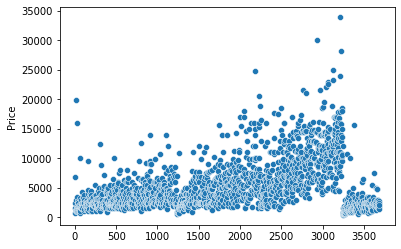

In [252]:
# 산점도 그려보기
sns.scatterplot(x = dropna_data.index, y = dropna_data['Price'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

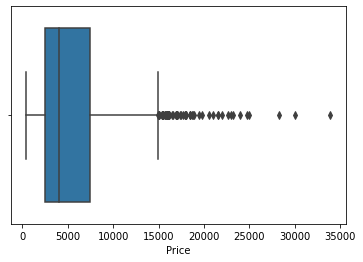

In [254]:
# box plot
sns.boxplot(dropna_data['Price'])


In [256]:
# 가격이 30000 넘는 부분 수상하니 추가 확인
dropna_data['Price'].sort_values(ascending = False)

3212    33900
2936    30000
3224    28240
3130    25000
2183    24770
        ...  
3242      500
3429      500
3246      499
1238      495
3245      400
Name: Price, Length: 1771, dtype: int64

In [257]:
dropna_data[dropna_data['Price'] == 33900]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine(L),Gearbox,Doors,Seats,Emission Class(EURO),Service history,brand,country
3212,MERCEDES-BENZ GLE CLASS,33900,92000,2019,1.0,Diesel,SUV,2.0,Automatic,5.0,5.0,6.0,Unknown,MERCEDES-BENZ,Germany


<AxesSubplot:xlabel='brand', ylabel='Price'>

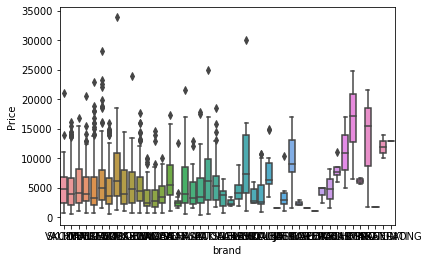

In [258]:
# box plot.2 브랜드별 가격
sns.boxplot(x = dropna_data['brand'], y = dropna_data['Price'], data = dropna_data)

In [261]:
# 브랜드별 평균 가격
pd.pivot_table(dropna_data, values='Price', index='brand', aggfunc='mean')

,Price
brand,
ABARTH,10975.000000
ALFA,3269.416667
AUDI,6949.621622
BMW,6840.879032
CHEVROLET,3691.000000
CHRYSLER,2399.666667
CITROEN,5305.181818
DACIA,7937.500000
DAEWOO,995.000000


<AxesSubplot:xlabel='Registration_Year', ylabel='count'>

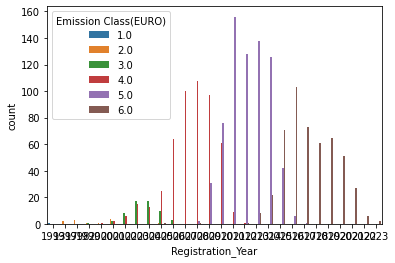

In [262]:
# Registration_Year(등록 연도)와 Emission Class(EURO)(배출 등급) 간의 관계 시각화
sns.countplot(x='Registration_Year', hue='Emission Class(EURO)', data=dropna_data)

# 회고
- 이전에 다루었던 데이터들은 정말 예쁘게 가공되어 있었다는 것을 처음 인지했다. 현실에서 만나는 데이터들은 이렇게 이상한 부분이 많고, 다듬고 채워야할 곳도 많다는 것을 알게되니 앞으로의 미래가 살짝 두려워졌다...ㅎ
- 도메인 지식이 중요하다는 말이 무슨 뜻인지 깨달았다. 자동차에 대한 지식이 없으니까 raw data를 이해하는 데에도 버벅거림이 있었다. 어느 정도 사전 지식이 있고 관심있는 분야부터 접근을 시작해야 좌절하지 않고 공부를 지속할 수 있을듯...
- 자꾸 데이터를 확인하고 덮어씌우는 단계를 빼먹는다. 주의해야겠다.
- 배운걸 다시 읽고 복붙하면서 어떻게든 이것 저것 해봤는데 뭐가 뭔지 모르겠다... 어렵다~!!!!!!!!!!!!!!!!